In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import time

In [2]:
api_key = "6bb7f55c691d1bdff841fdc67934b3b8"

### Find Song

In [3]:
def find_song(artist, track):
    results = []
    artists_list = []
    params_get_artists = {
        "method" : "artist.search",
        "format" : "json",
        "limit" : 100,
        "artist" : artist,
        "api_key" : api_key
    }
    artists = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_get_artists)
    for artist in artists.json()['results']['artistmatches']['artist']:
            artists_list.append(artist['name'])

    tracks_list = []
    params_get_tracks = {
        "method" : "track.search",
        "format" : "json",
        "limit" : 100,
        "track" : track,
        "api_key" : api_key
    }
    tracks = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_get_tracks)
    for track in tracks.json()['results']['trackmatches']['track']:
        if track['artist'] in artists_list:
            return_track = track['name']
            return_artist = track['artist']
            results.append((return_artist, return_track))
    if len(results) > 0:
        return results
    return('Could not find track. Please search again.')

## Get Artist Info

In [4]:
def get_artist_info(result_artist):
    params_artist_info = {
    "method" : "artist.getInfo",
    "format" : "json",
    "artist" : result_artist,
    "api_key" : api_key
}
    artist_info = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_artist_info)
    content = artist_info.json()['artist']['bio']['content']
    listeners = int(artist_info.json()['artist']['stats']['listeners'])
    playcount = int(artist_info.json()['artist']['stats']['playcount'])
    return (listeners, playcount, content)

## Get Track Info

In [5]:
def get_track_info(result_artist, result_track):
    params_track_info = {
    "method" : "track.getInfo",
    "format" : "json",
    "artist" : result_artist,
    "track" : result_track,
    "api_key" : api_key
}
    track_info = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_track_info)
    track_listeners = int(track_info.json()['track']['listeners'])
    track_playcounts = int(track_info.json()['track']['playcount'])
    track_duration = int(track_info.json()['track']['duration'])
    try:
        track_content = track_info.json()['track']['wiki']['content']
    except:
        track_content = 'Track information unavailable.'
    try:
        track_album = track_info.json()['track']['album']['title']
    except:
        track_album = 'Album unavailable.'
    return (track_duration, track_listeners, track_playcounts, track_album, track_content)

## Get Similar Tracks

In [6]:
def get_similar_tracks(result_artist, result_track):
    params_get_similar_tracks = {
        "method" : "track.getSimilar",
        "format" : "json",
        "artist" : result_artist,
        "track" : result_track,
        "api_key" : api_key
    }
    df = pd.DataFrame(columns = ['Info', 'Album', 'Duration', 'Listeners', 'Playcount'])
    similar_tracks = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_get_similar_tracks)
    counter = 1
    for sim_track in similar_tracks.json()['similartracks']['track'][:10]:
        return_similar_track = sim_track['name']
        return_similar_artist = sim_track['artist']['name']
        sim_track_duration, sim_track_listeners, sim_track_playcounts, sim_track_album, sim_track_content = get_track_info(return_similar_artist, return_similar_track)
        sim_df = pd.DataFrame({'Info' : [str(counter) + '. ' + return_similar_track + ' \n ' + return_similar_artist],
                               'Album' : [sim_track_album], 
                               'Duration' : [sim_track_duration], 
                               'Listeners' : [sim_track_listeners], 
                               'Playcount' : [sim_track_playcounts]})
        df = df.append(sim_df, ignore_index= True)
        counter += 1
    return df

## Get Similar Artists

In [7]:
def get_artist_counts(result_artist):
    params_artist_counts = {
    "method" : "artist.getInfo",
    "format" : "json",
    "artist" : result_artist,
    "api_key" : api_key
}
    artist_info = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_artist_counts)
    listeners = int(artist_info.json()['artist']['stats']['listeners'])
    playcount = int(artist_info.json()['artist']['stats']['playcount'])
    return (listeners, playcount)

In [8]:
def get_similar_artists(result_artist):
    params_get_similar_artists = {
        "method" : "artist.getSimilar",
        "format" : "json",
        "artist" : result_artist,
        "api_key" : api_key
    }
    similar_artists = requests.get('http://ws.audioscrobbler.com/2.0/', params=params_get_similar_artists)
    df_sim_artists = pd.DataFrame(columns = ['Info', 'Listeners', 'Playcount'])
    counter = 1
    for artist in similar_artists.json()['similarartists']['artist'][:10]:
        return_similar_artist_art = artist['name']
        sim_art_listeners, sim_art_playcount = get_artist_counts(return_similar_artist_art)
        df_sim_artists_art = pd.DataFrame({'Info' : [str(counter) + '. ' + return_similar_artist_art],
                                         'Listeners' : [sim_art_listeners],
                                         'Playcount' : [sim_art_playcount]})
        df_sim_artists = df_sim_artists.append(df_sim_artists_art, ignore_index = True)
        counter += 1
    return df_sim_artists

## Results

In [9]:
results = find_song(artist = '50', track = "da club")
result_artist = results[0][0]
result_track = results[0][1]
print(result_artist)
print(result_track)

50 Cent
In Da Club


In [10]:
listeners, playcount, artist_info = get_artist_info(result_artist)
print(listeners)
print(playcount)
print(artist_info)

2762154
42238984
Curtis James Jackson III (born July 6, 1975 in South Jamaica, Queens, New York), better known by his stage name 50 Cent, is a Grammy award nominated rapper, actor, singer, entrepreneur, author and founder of the hip hop group and label G-Unit. 

After leaving drug dealing to pursue a rap career, he released his debut album Guess Who's Back Again in 2002. He was discovered by Eminem and Dr. Dre and then signed to Interscope Records. He has since released Get Rich or Die Tryin' (2003), The Massacre (2006), Curtis (2007) and Before I Self Destruct (2009).

50 Cent has engaged in feuds with other rappers including Jay-Z, Ja Rule, The Game, Cam'ron, Fat Joe, and Rick Ross. He has also pursued an acting career, appearing in the semi-autobiographical film Get Rich or Die Tryin' in 2005, the Iraq War film Home of the Brave in 2006, and Righteous Kill in 2008. 50 Cent is one of the richest hip-hop performers, having a net worth estimated at US $440 million in 2008.

Before 50 C

In [11]:
track_duration, track_listeners, track_playcounts, track_album, track_content = get_track_info(result_artist, result_track)
print(track_duration)
print(track_listeners)
print(track_playcounts)
print(track_album)
print(track_content)

193000
1036236
3803386
Get Rich Or Die Tryin'
"In Da Club" is a hip hop song performed by rapper 50 Cent for his commercial debut album Get Rich or Die Tryin'. The song was produced by Dr. Dre with co-production from Mike Elizondo. 50 Cent, Dr. Dre, and Elizondo also wrote the song. The track was released in late 2002 as the album's lead single and was well received by music critics.

"In Da Club" became 50 Cent's first number one single and was one of 2003's most popular songs after reaching number one in the United States and peaking inside the top five on the majority of the European charts it entered. At the 46th Grammy Awards, it was nominated for Best Male Rap Solo Performance and Best Rap Song.

After 50 Cent was discovered by Eminem in 2002, he was invited to fly to Los Angeles where he was introduced to Dr. Dre. 50 Cent recorded seven songs in five days with Dr. Dre, with "In da Club" being the first track they recorded. 50 Cent described the studio sessions saying:

Dre, he'l

In [12]:
sim_tracks_df = get_similar_tracks(result_artist, result_track)

In [13]:
sim_tracks_df

,Info,Album,Duration,Listeners,Playcount
0,1. P.I.M.P. \n 50 Cent,Get Rich Or Die Tryin',249000,457872,1515972
1,2. High All The Time \n 50 Cent,Get Rich Or Die Tryin',269000,110300,428147
2,3. Purple Pills \n D12,Devils Night,0,145641,636370
3,4. My Band \n D12,D12 World,298000,380601,1294091
4,5. Right for Me \n Eminem,SHADYXV,281000,9603,48007
5,6. Lose Yourself \n Eminem,Curtain Call: The Hits,326000,902735,5745820
6,7. The Setup \n Obie Trice,SHADYXV,193000,19186,64219
7,8. Y'all Ready Know \n Slaughterhouse,SHADYXV,231000,15183,51475
8,9. Vegas \n Bad Meets Evil,SHADYXV,318000,12270,62163
9,10. Still D.R.E. \n Dr. Dre,2001: Instrumentals,268000,888470,3842987


In [14]:
sim_track_name_1 = sim_tracks_df['Info'][0]
sim_track_album_1 = sim_tracks_df['Album'][0]
sim_track_duration_1 = sim_tracks_df['Duration'][0]
sim_track_listeners_1 = sim_tracks_df['Listeners'][0]
sim_track_playcount_1 = sim_tracks_df['Playcount'][0]

sim_track_name_2 = sim_tracks_df['Info'][1]
sim_track_album_2 = sim_tracks_df['Album'][1]
sim_track_duration_2 = sim_tracks_df['Duration'][1]
sim_track_listeners_2 = sim_tracks_df['Listeners'][1]
sim_track_playcount_2 = sim_tracks_df['Playcount'][1]

sim_track_name_3 = sim_tracks_df['Info'][2]
sim_track_album_3 = sim_tracks_df['Album'][2]
sim_track_duration_3 = sim_tracks_df['Duration'][2]
sim_track_listeners_3 = sim_tracks_df['Listeners'][2]
sim_track_playcount_3 = sim_tracks_df['Playcount'][2]

sim_track_name_4 = sim_tracks_df['Info'][3]
sim_track_album_4 = sim_tracks_df['Album'][3]
sim_track_duration_4 = sim_tracks_df['Duration'][3]
sim_track_listeners_4 = sim_tracks_df['Listeners'][3]
sim_track_playcount_4 = sim_tracks_df['Playcount'][3]

sim_track_name_5 = sim_tracks_df['Info'][4]
sim_track_album_5 = sim_tracks_df['Album'][4]
sim_track_duration_5 = sim_tracks_df['Duration'][4]
sim_track_listeners_5 = sim_tracks_df['Listeners'][4]
sim_track_playcount_5 = sim_tracks_df['Playcount'][4]

sim_track_name_6 = sim_tracks_df['Info'][5]
sim_track_album_6 = sim_tracks_df['Album'][5]
sim_track_duration_6 = sim_tracks_df['Duration'][5]
sim_track_listeners_6 = sim_tracks_df['Listeners'][5]
sim_track_playcount_6 = sim_tracks_df['Playcount'][5]

sim_track_name_7 = sim_tracks_df['Info'][6]
sim_track_album_7 = sim_tracks_df['Album'][6]
sim_track_duration_7 = sim_tracks_df['Duration'][6]
sim_track_listeners_7 = sim_tracks_df['Listeners'][6]
sim_track_playcount_7 = sim_tracks_df['Playcount'][6]

sim_track_name_8 = sim_tracks_df['Info'][7]
sim_track_album_8 = sim_tracks_df['Album'][7]
sim_track_duration_8 = sim_tracks_df['Duration'][7]
sim_track_listeners_8 = sim_tracks_df['Listeners'][7]
sim_track_playcount_8 = sim_tracks_df['Playcount'][7]

sim_track_name_9 = sim_tracks_df['Info'][8]
sim_track_album_9 = sim_tracks_df['Album'][8]
sim_track_duration_9 = sim_tracks_df['Duration'][8]
sim_track_listeners_9 = sim_tracks_df['Listeners'][8]
sim_track_playcount_9 = sim_tracks_df['Playcount'][8]

sim_track_name_10 = sim_tracks_df['Info'][9]
sim_track_album_10 = sim_tracks_df['Album'][9]
sim_track_duration_10 = sim_tracks_df['Duration'][9]
sim_track_listeners_10 = sim_tracks_df['Listeners'][9]
sim_track_playcount_10 = sim_tracks_df['Playcount'][9]

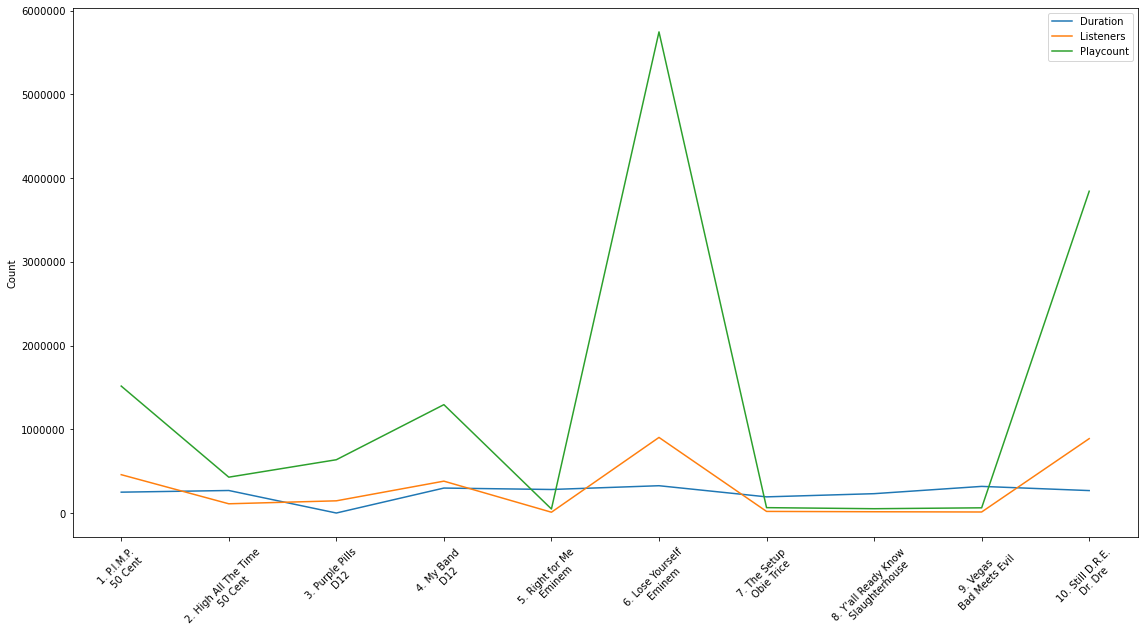

In [15]:
plt.figure(figsize = (16, 9))
plt.plot(sim_tracks_df['Info'], sim_tracks_df['Duration'], label = 'Duration')
plt.plot(sim_tracks_df['Info'], sim_tracks_df['Listeners'], label = 'Listeners')
plt.plot(sim_tracks_df['Info'], sim_tracks_df['Playcount'], label = 'Playcount')
plt.xticks(rotation = 45)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.savefig('./test.png');

In [21]:
sim_art_df = get_similar_artists(result_artist)

In [22]:
sim_art_df

,Info,Listeners,Playcount
0,1. G-Unit,821359,5395370
1,2. Lloyd Banks,934056,6828207
2,3. Tony Yayo,308562,1390456
3,4. The Game,2098037,30813797
4,5. D12,1252359,10019945
5,6. Eminem,4727354,221571973
6,7. Obie Trice,809737,4575123
7,8. 2Pac,2300893,60740852
8,9. DMX,1510670,17539777
9,10. Young Buck,658402,4298108


In [25]:
sim_art_name_1 = sim_art_df['Info'][0]
sim_art_listeners_1 = sim_art_df['Listeners'][0]
sim_art_playcount_1 = sim_art_df['Playcount'][0]

sim_art_name_2 = sim_art_df['Info'][1]
sim_art_listeners_2 = sim_art_df['Listeners'][1]
sim_art_playcount_2 = sim_art_df['Playcount'][1]

sim_art_name_3 = sim_art_df['Info'][2]
sim_art_listeners_3 = sim_art_df['Listeners'][2]
sim_art_playcount_3 = sim_art_df['Playcount'][2]

sim_art_name_4 = sim_art_df['Info'][3]
sim_art_listeners_4 = sim_art_df['Listeners'][3]
sim_art_playcount_4 = sim_art_df['Playcount'][3]

sim_art_name_5 = sim_art_df['Info'][4]
sim_art_listeners_5 = sim_art_df['Listeners'][4]
sim_art_playcount_5 = sim_art_df['Playcount'][4]

sim_art_name_6 = sim_art_df['Info'][5]
sim_art_listeners_6 = sim_art_df['Listeners'][5]
sim_art_playcount_6 = sim_art_df['Playcount'][5]

sim_art_name_7 = sim_art_df['Info'][6]
sim_art_listeners_7 = sim_art_df['Listeners'][6]
sim_art_playcount_7 = sim_art_df['Playcount'][6]

sim_art_name_8 = sim_art_df['Info'][7]
sim_art_listeners_8 = sim_art_df['Listeners'][7]
sim_art_playcount_8 = sim_art_df['Playcount'][7]

sim_art_name_9 = sim_art_df['Info'][8]
sim_art_listeners_9 = sim_art_df['Listeners'][8]
sim_art_playcount_9 = sim_art_df['Playcount'][8]

sim_art_name_10 = sim_art_df['Info'][9]
sim_art_listeners_10 = sim_art_df['Listeners'][9]
sim_art_playcount_10 = sim_art_df['Playcount'][9]

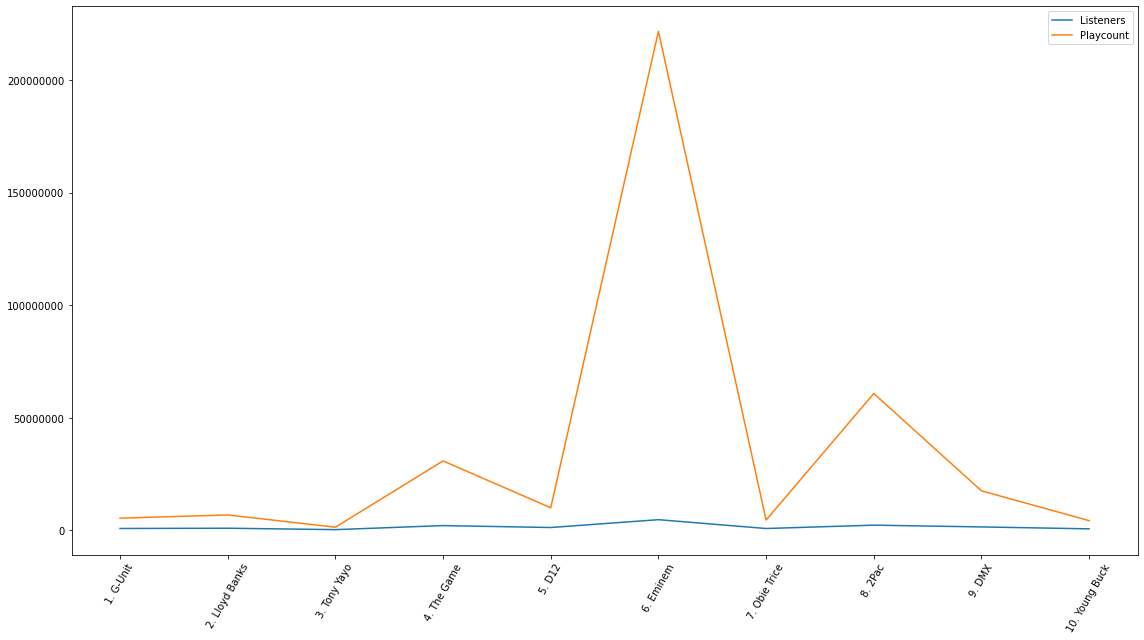

In [23]:
plt.figure(figsize = (16, 9))
plt.plot(sim_art_df['Info'], sim_art_df['Listeners'], label = 'Listeners')
plt.plot(sim_art_df['Info'], sim_art_df['Playcount'], label = 'Playcount')
plt.xticks(rotation = 60)
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.tight_layout()